여러분은 왜 개 사료가 예상보다 빨리 상하게 되는지를 파악하기위해 개 사료 회사에 고용되었습니다. 안 좋은 소식은 이 회사는 한동안 장비를 업그레이드 하지 않았습니다. 즉, 이 회사에서 사용하는 5가지 방부제의 사용 용량이 중구난방이라는 뜻입니다. 하지만 그 중에서 가장 많은 영향을 끼치는 것이 무엇일까요?<br>
이 회사에서는 먼저 4가지 방부제(A, B, C, D)가 함유된 방부제 묶음을 섞은 뒤 '필러'라는 화학물질로 마무리합니다. 식품과학자들은 A, B, C, D 방부제 중 하나가 문제를 일으키고 있다고 생각하지만, 그게 어떤 것인지 명확하게 하기위해 여러분이 고용됐습니다. "랜덤포레스트"로 어떤 방부제가 사료를 빨리 상하게 하는지 찾아보세요!

- Pres_A : 혼합물의 A비율
- Pres_B : 혼합물의 B비율
- Pres_C : 혼합물의 C비율
- Pres_D : 혼합물의 D비율
- Spoiled : 개 사료가 상했는지 여부를 나타내는 레이블.

**시나리오에서 요구하는 바를 고려하여, 머신러닝을 이용해서 문제를 풀어보세요.**

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                               GradientBoostingClassifier)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [8]:
df = pd.read_csv('./data/dog_food.csv')

In [9]:
df.head()

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,4,2,12.0,3,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A        490 non-null    int64  
 1   B        490 non-null    int64  
 2   C        490 non-null    float64
 3   D        490 non-null    int64  
 4   Spoiled  490 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 19.3 KB


In [5]:
df.describe()

,A,B,C,D,Spoiled
count,490.000000,490.000000,490.000000,490.000000,490.000000
mean,5.534694,5.504082,9.126531,5.579592,0.285714
std,2.951520,2.853797,2.055545,2.854837,0.452216
min,1.000000,1.000000,5.000000,1.000000,0.000000
25%,3.000000,3.000000,8.000000,3.000000,0.000000
50%,5.000000,6.000000,9.000000,6.000000,0.000000
75%,8.000000,8.000000,11.000000,8.000000,1.000000
max,10.000000,10.000000,14.000000,10.000000,1.000000


- 전반적으로 C 컬럼에 이상이 있어보임

In [6]:
df.shape

(490, 5)

In [20]:
df['A'].value_counts()

A
10    59
2     57
4     56
9     54
5     52
8     49
3     47
1     44
6     43
7     29
Name: count, dtype: int64

In [21]:
df['A'].unique()

array([ 4,  5,  6, 10,  8,  3,  9,  1,  2,  7], dtype=int64)

In [22]:
df['Spoiled'].value_counts()

Spoiled
0.0    350
1.0    140
Name: count, dtype: int64

In [30]:
df_corr = df.corr()

In [25]:
sns.set(rc = {'figure.figsize':(12, 9)})

C:\Users\ITSC\AppData\Local\Temp\ipykernel_14012\1233010157.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spoiled'])


<Axes: xlabel='Spoiled', ylabel='Density'>

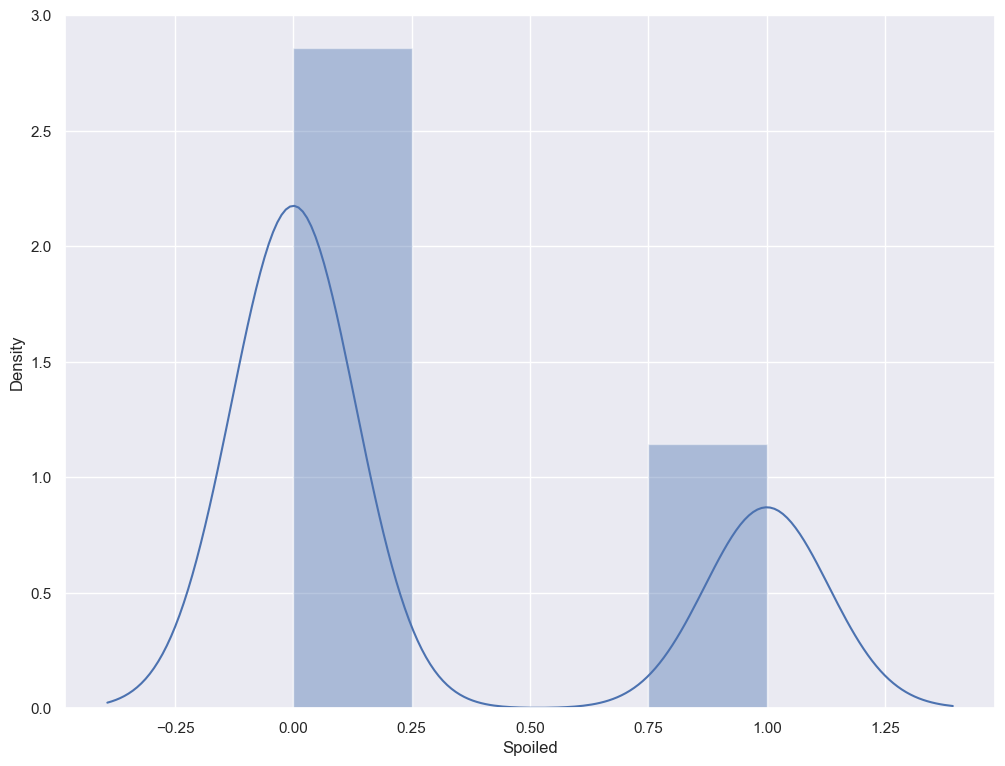

In [26]:
sns.distplot(df['Spoiled'])

C:\Users\ITSC\AppData\Local\Temp\ipykernel_14012\3836774172.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['C'])


<Axes: xlabel='C', ylabel='Density'>

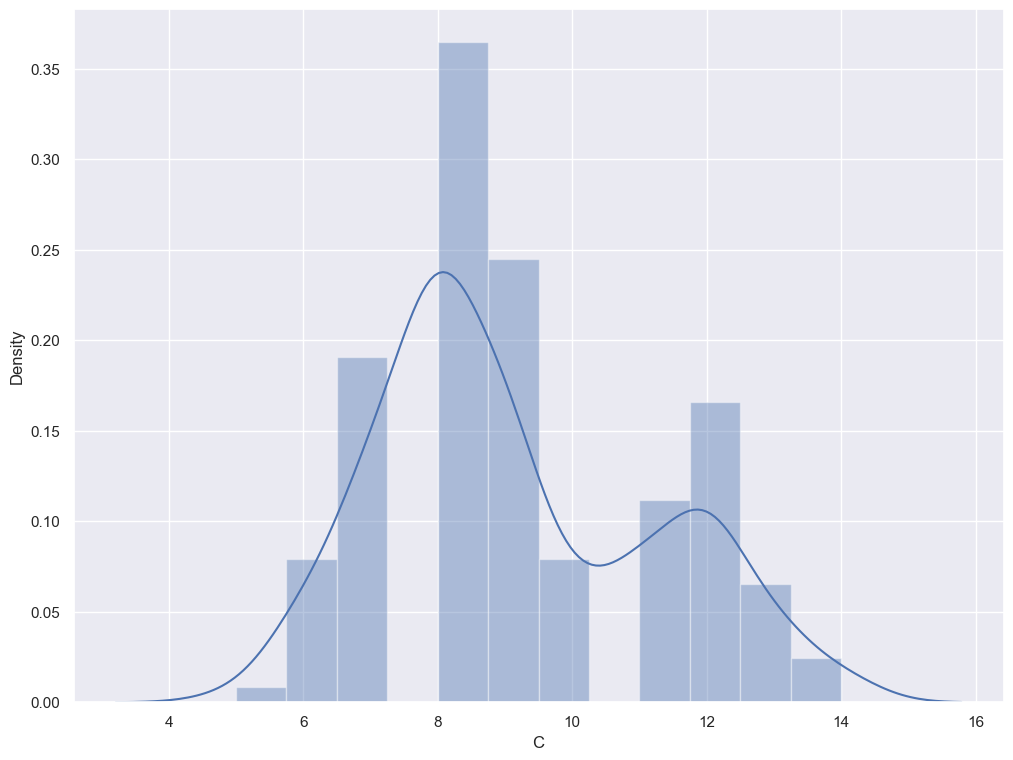

In [28]:
sns.distplot(df['C'])

In [27]:
df['A'].nunique()

10

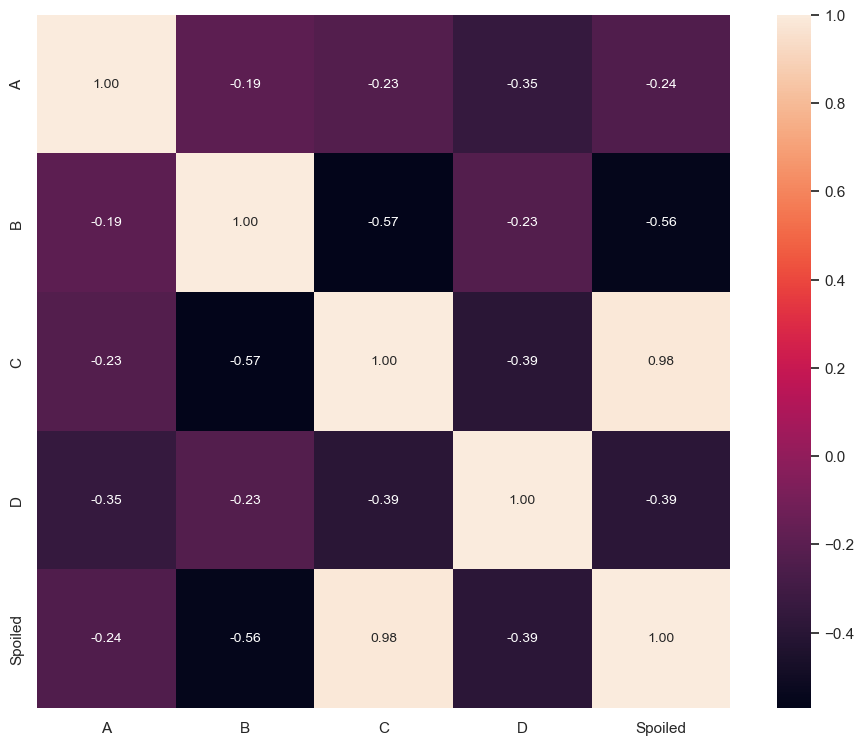

In [33]:
corr_mat = np.corrcoef(df_corr.values.T)
sns.set()
full_mat = sns.heatmap(corr_mat, cbar = True, annot = True, square = True, fmt = ".2f",
                      annot_kws = {"size" : 10}, yticklabels = df_corr,
                      xticklabels = df_corr)
plt.show()

C:\Users\ITSC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


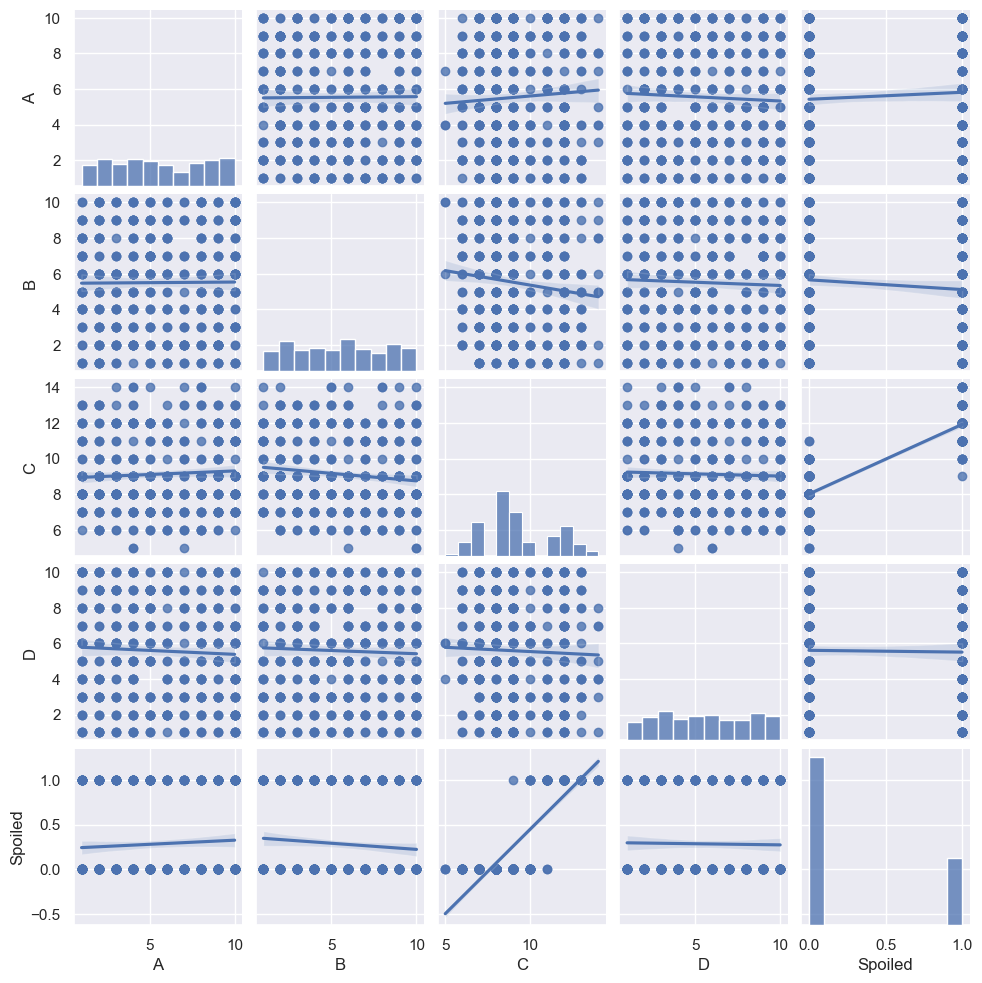

In [34]:
sns.pairplot(df, kind='reg', height = 2)

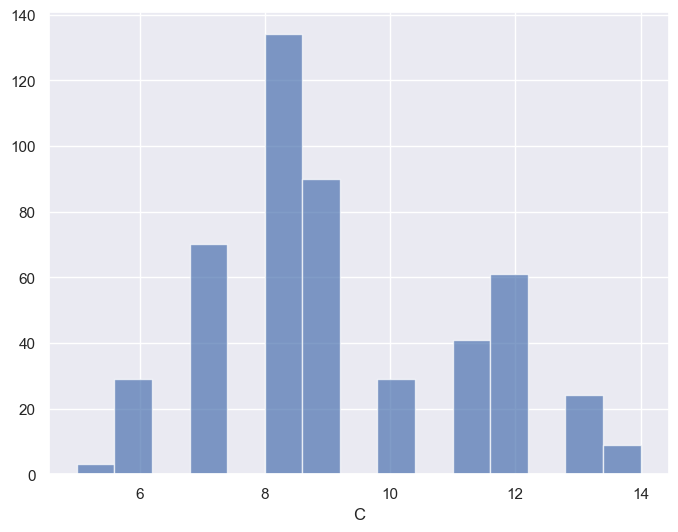

In [35]:
plt.figure(figsize = (8, 6))
plt.xlabel('C')
plt.hist(df['C'], bins = 15, alpha = 0.7)
plt.show()

(array([[ 44.,  57., 103.,  52.,  43.,  78.,  54.,  59.,   0.,   0.],
        [ 41.,  62.,  91.,  43.,  66.,  83.,  57.,  47.,   0.,   0.],
        [  0.,   0.,   0.,   3.,  29., 204.,  90.,  70.,  61.,  33.],
        [ 39.,  48., 106.,  51.,  52.,  85.,  58.,  51.,   0.,   0.],
        [490.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 5 BarContainer objects>)

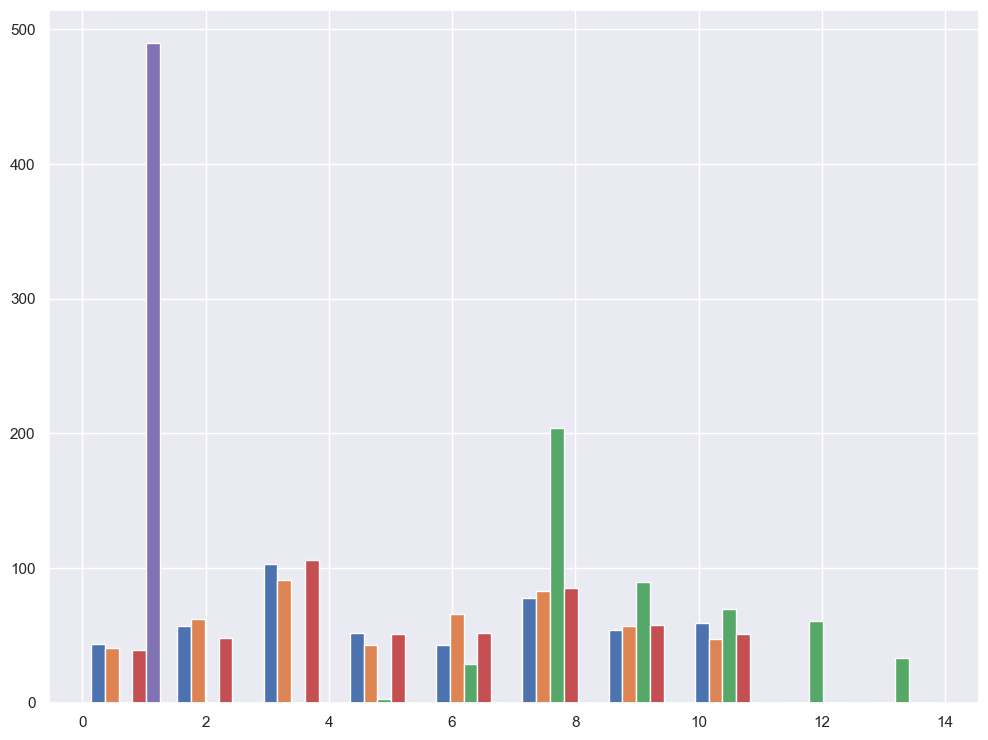

In [43]:
plt.hist(df)

In [13]:
x = df.drop('Spoiled', axis = 1)
y = df['Spoiled']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y,
                                                    random_state = 11)

In [53]:
x_train.shape, x_test.shape

((367, 4), (123, 4))

In [15]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 11)

In [16]:
scores = cross_validate(rf, x_train, y_train, return_train_score = True, n_jobs = -1)

In [17]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9959090803556917 0.9754535357275083


In [18]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=11)

In [19]:
# 특성 중요도 
rf.feature_importances_

array([0.03579059, 0.03950709, 0.88685377, 0.03784855])

In [44]:
rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 11)
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=11)

In [45]:
rf.oob_score_

0.9754768392370572

In [59]:
# C가 이상한 데이터인지 확인
outliers = df[df['C'] > 1]  # C 비율이 1보다 큰 값을 이상치로 간주
print("이상치 개수:", len(outliers))
print(outliers)

이상치 개수: 490
     A  B     C   D  Spoiled
0    4  2  12.0   3      1.0
1    5  6  12.0   7      1.0
2    6  2  13.0   6      1.0
3    4  2  12.0   1      1.0
4    4  2  12.0   3      1.0
..  .. ..   ...  ..      ...
485  8  3   6.0   6      0.0
486  6  4   9.0  10      0.0
487  1  3   8.0   3      0.0
488  6  6   8.0   3      0.0
489  1  9   7.0   4      0.0

[490 rows x 5 columns]


In [46]:
df.columns

Index(['A', 'B', 'C', 'D', 'Spoiled'], dtype='object')

In [47]:
nf = df.copy()
nf.head()

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,4,2,12.0,3,1.0


In [50]:
# C를 제외하고
new_x = nf[['A', 'B', 'D']]
new_y = nf['Spoiled']

In [51]:
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size = 0.25, stratify = new_y,
                                                                    random_state = 11)

In [ ]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 11)

In [52]:
new_x_train.shape, new_x_test.shape

((367, 3), (123, 3))

In [56]:
ss = StandardScaler()
scaled_train = ss.fit_transform(new_x_train)
scaled_test = ss.transform(new_x_test)

In [57]:
logi = LogisticRegression()
logi.fit(scaled_train, new_y_train)
print(logi.score(scaled_train, new_y_train))
print(logi.score(scaled_test, new_y_test))

0.7138964577656676
0.7154471544715447


In [58]:
logi.coef_, logi.intercept_

(array([[ 0.15130515, -0.24737739,  0.01172477]]), array([-0.9322368]))

In [60]:
df.head()

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,4,2,12.0,3,1.0


In [61]:
pred = lr.predict(new_x_test)

NameError: name 'lr' is not defined